In [ ]:
import tensorflow as tf
import keras 
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import re
from tqdm import tqdm
from tensorflow.keras.utils import img_to_array

In [ ]:
# Fungsi untuk mengurutkan secara alfanumerik
def sorted_alphanumeric(data):  
    convert = lambda text: int(text) if text.isdigit() else text.lower()
    alphanum_key = lambda key: [convert(c) for c in re.split('([0-9]+)', key)]
    return sorted(data, key=alphanum_key)

# Ukuran gambar yang diinginkan
SIZE = 128
_img = []

# Path ke direktori gambar
path = r'D:\SKRIPSI\SKRIPSI LEUKEMIA\DATASET\archive (3)\C-NMC_Leukemia\training_data\hem'
files = os.listdir(path)
files = sorted_alphanumeric(files)

# Loop untuk membaca dan memproses gambar
for i in tqdm(files):
    if i == 'seed9090.png':
        break
    else:
        img_path = os.path.join(path, i)
        img = cv2.imread(img_path, 1)

        # Resize gambar
        img = cv2.resize(img, (SIZE, SIZE))

        # Normalisasi gambar ke rentang [-1, 1]
        img = (img - 127.5) / 127.5

        # Konversi ke array
        img_array = img_to_array(img)
        _img.append(img_array)


100%|██████████| 3389/3389 [00:27<00:00, 123.29it/s]


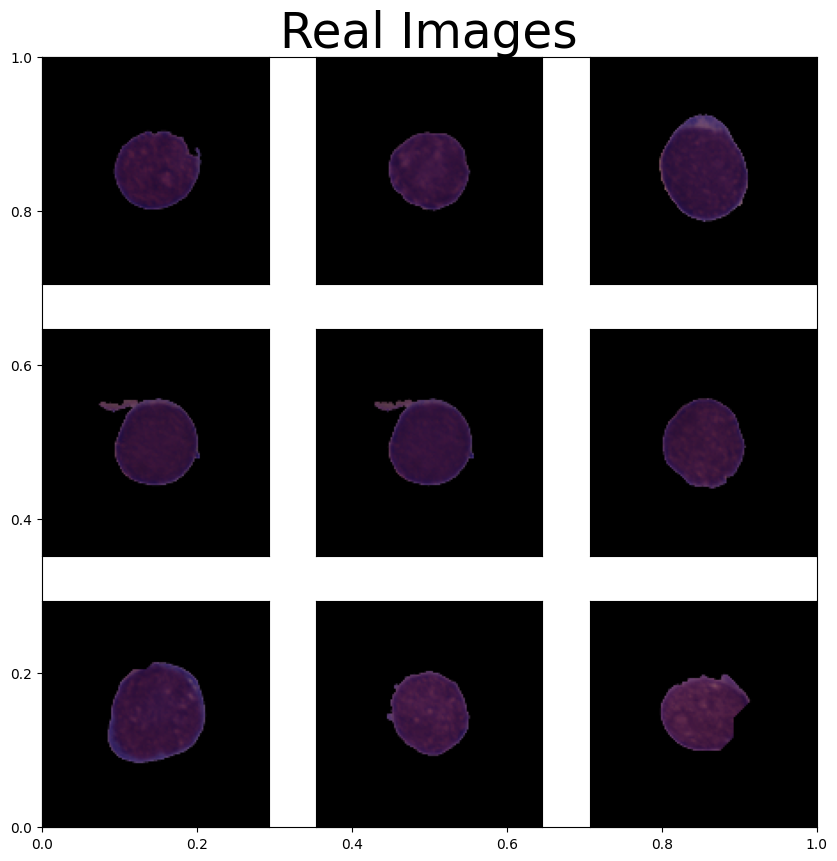

In [3]:
def plot_images(sqr = 5):
    plt.figure(figsize = (10,10))
    plt.title("Real Images",fontsize = 35)
    for i in range(sqr * sqr):
        plt.subplot(sqr,sqr,i+1)
        plt.imshow(_img[i]*0.5 + 0.5 )
        plt.xticks([])
        plt.yticks([])

# to plot images
plot_images(3)

In [4]:
batch_size = 32
dataset=tf.data.Dataset.from_tensor_slices(np.array(_img)).batch(batch_size)

In [ ]:
latent_dim=100
def Generator():
    model = tf.keras.Sequential()
    model.add(layers.Dense(128*128*3, input_shape=(latent_dim,)))
    model.add(layers.Reshape((128,128,3)))
    # downsampling
    model.add(tf.keras.layers.Conv2D(128,3, strides=1, 
                                     padding='same',kernel_initializer='he_normal'))
    model.add(tf.keras.layers.Conv2D(128,3, strides=2, 
                                     padding='same',kernel_initializer='he_normal'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.LeakyReLU(alpha=0.2))
    model.add(tf.keras.layers.Conv2D(256,3, strides=1, 
                                     padding='same',kernel_initializer='he_normal'))
    model.add(tf.keras.layers.Conv2D(256,3, strides=2, 
                                     padding='same',kernel_initializer='he_normal'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.LeakyReLU(alpha=0.2))
    model.add(tf.keras.layers.Conv2DTranspose(512, 3, strides=1,
                                              padding='same',kernel_initializer='he_normal'))
    model.add(tf.keras.layers.Conv2D(512,3, strides=2, 
                                     padding='same',kernel_initializer='he_normal'))
    model.add(tf.keras.layers.LeakyReLU(alpha=0.2))
    #upsampling
    model.add(tf.keras.layers.Conv2DTranspose(512, 3, strides=1,
                                              padding='same',kernel_initializer='he_normal'))
    model.add(tf.keras.layers.Conv2DTranspose(512, 3, strides=2,
                                              padding='same',kernel_initializer='he_normal'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.LeakyReLU(alpha=0.2))
    model.add(tf.keras.layers.Conv2DTranspose(256, 3, strides=1,
                                              padding='same',kernel_initializer='he_normal'))
    model.add(tf.keras.layers.Conv2DTranspose(256, 3, strides=2,
                                              padding='same',kernel_initializer='he_normal'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Conv2DTranspose(128, 3, strides=2,
                                              padding='same',kernel_initializer='he_normal'))
    model.add(tf.keras.layers.Conv2DTranspose(128, 3, strides=1,
                                              padding='same',kernel_initializer='he_normal'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Conv2DTranspose(3,3,strides = 1, 
                                              padding = 'same',activation = 'tanh'))
    
    return model

In [19]:
generator = Generator()
generator.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 49152)             4964352   
                                                                 
 reshape_1 (Reshape)         (None, 128, 128, 3)       0         
                                                                 
 conv2d_10 (Conv2D)          (None, 128, 128, 128)     3584      
                                                                 
 conv2d_11 (Conv2D)          (None, 64, 64, 128)       147584    
                                                                 
 batch_normalization_9 (Batc  (None, 64, 64, 128)      512       
 hNormalization)                                                 
                                                                 
 leaky_re_lu_9 (LeakyReLU)   (None, 64, 64, 128)       0         
                                                      

In [ ]:
SIZE=128
def Discriminator():
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Input((SIZE, SIZE, 3)))
    model.add(tf.keras.layers.Conv2D(128,4, strides=2, padding='same',kernel_initializer='he_normal'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.LeakyReLU(alpha=0.2))
    model.add(tf.keras.layers.Conv2D(128,4, strides=2, padding='same',kernel_initializer='he_normal'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.LeakyReLU(alpha=0.2))
    model.add(tf.keras.layers.Conv2D(256,4, strides=2, padding='same',kernel_initializer='he_normal'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.LeakyReLU(alpha=0.2))
    model.add(tf.keras.layers.Conv2D(256,4, strides=2, padding='same',kernel_initializer='he_normal'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.LeakyReLU(alpha=0.2))
    model.add(tf.keras.layers.Conv2D(512,4, strides=2, padding='same',kernel_initializer='he_normal'))
    model.add(tf.keras.layers.LeakyReLU(alpha=0.2))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(1,activation = 'sigmoid'))
    
    return model

In [ ]:
discriminator = Discriminator()
discriminator.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 64, 64, 128)       6272      
                                                                 
 batch_normalization_18 (Bat  (None, 64, 64, 128)      512       
 chNormalization)                                                
                                                                 
 leaky_re_lu_18 (LeakyReLU)  (None, 64, 64, 128)       0         
                                                                 
 conv2d_21 (Conv2D)          (None, 32, 32, 128)       262272    
                                                                 
 batch_normalization_19 (Bat  (None, 32, 32, 128)      512       
 chNormalization)                                                
                                                                 
 leaky_re_lu_19 (LeakyReLU)  (None, 32, 32, 128)      

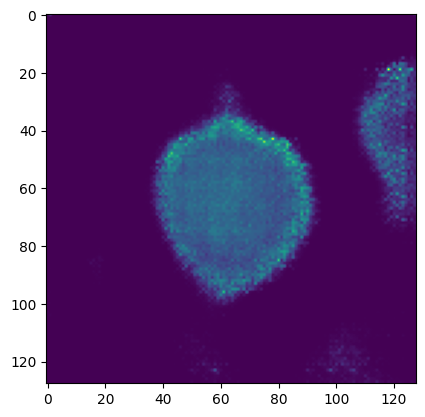

In [32]:
noise = np.random.normal(-1,1,(1,100))
img = generator(noise)
plt.imshow(img[0,:,:,0])
plt.show()

In [33]:
optimizer = tf.keras.optimizers.legacy.RMSprop(
        lr=.0001,
        clipvalue=1.0,
        decay=1e-8
    )
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits = True)

In [34]:
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output),fake_output)
def discriminator_loss(fake_output, real_output):
    fake_loss = cross_entropy(tf.zeros_like(fake_output),fake_output)
    real_loss = cross_entropy(tf.ones_like(real_output),real_output)
    return fake_loss + real_loss

In [35]:
def train_steps(images):
    noise = np.random.normal(0,1,(batch_size,latent_dim))
    with tf.GradientTape() as gen_tape , tf.GradientTape() as disc_tape:
        generated_images = generator(noise)
        fake_output = discriminator(generated_images)
        real_output = discriminator(images)
        
        gen_loss = generator_loss(fake_output)
        dis_loss = discriminator_loss(fake_output, real_output)
        
        
    gradient_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)    
    gradient_of_discriminator = disc_tape.gradient(dis_loss, discriminator.trainable_variables)
    
    optimizer.apply_gradients(zip(gradient_of_generator,generator.trainable_variables))
    optimizer.apply_gradients(zip(gradient_of_discriminator, discriminator.trainable_variables))
    
    loss = {'gen loss':gen_loss,
           'disc loss': dis_loss}
    return loss

In [ ]:
def plot_generated_images(square = 5, epochs = 0):  
  plt.figure(figsize = (10,10))
  for i in range(square * square):
    if epochs != 0:    
        if(i == square //2):
            plt.title("Generated Image at Epoch:{}\n".format(epochs), fontsize = 32, color = 'black')
    plt.subplot(square, square, i+1)
    noise = np.random.normal(0,1,(1,latent_dim))
    img = generator(noise)
    plt.imshow(np.clip((img[0,...]+1)/2, 0, 1))
    
    plt.xticks([])
    plt.yticks([])
    plt.grid()

In [ ]:
import time
def train(epochs,dataset):
    for epoch in range(epochs):
        start = time.time()
        print("\nEpoch : {}".format(epoch + 1))
        for images in dataset:
            loss = train_steps(images)
        print(" Time:{}".format(np.round(time.time() - start),2)) 
        print("Generator Loss: {} Discriminator Loss: {}".format(loss['gen loss'],loss['disc loss']))

In [41]:
train(10,dataset)


Epoch : 1
 Time:1539.0
Generator Loss: 1.1268552541732788 Discriminator Loss: 1.2561399936676025

Epoch : 2
 Time:1549.0
Generator Loss: 0.5069926977157593 Discriminator Loss: 1.361577033996582

Epoch : 3
 Time:1551.0
Generator Loss: 1.093215823173523 Discriminator Loss: 1.3252413272857666

Epoch : 4
 Time:1579.0
Generator Loss: 0.7027181386947632 Discriminator Loss: 1.2722465991973877

Epoch : 5
 Time:1579.0
Generator Loss: 0.7113819122314453 Discriminator Loss: 1.123882532119751

Epoch : 6
 Time:1657.0
Generator Loss: 2.2764532566070557 Discriminator Loss: 2.6202595233917236

Epoch : 7
 Time:1583.0
Generator Loss: 0.9845238924026489 Discriminator Loss: 1.2418739795684814

Epoch : 8
 Time:1571.0
Generator Loss: 0.4410606026649475 Discriminator Loss: 1.27836012840271

Epoch : 9
 Time:1566.0
Generator Loss: 0.6005809307098389 Discriminator Loss: 1.1269452571868896

Epoch : 10
 Time:1567.0
Generator Loss: 0.42890992760658264 Discriminator Loss: 1.451322078704834


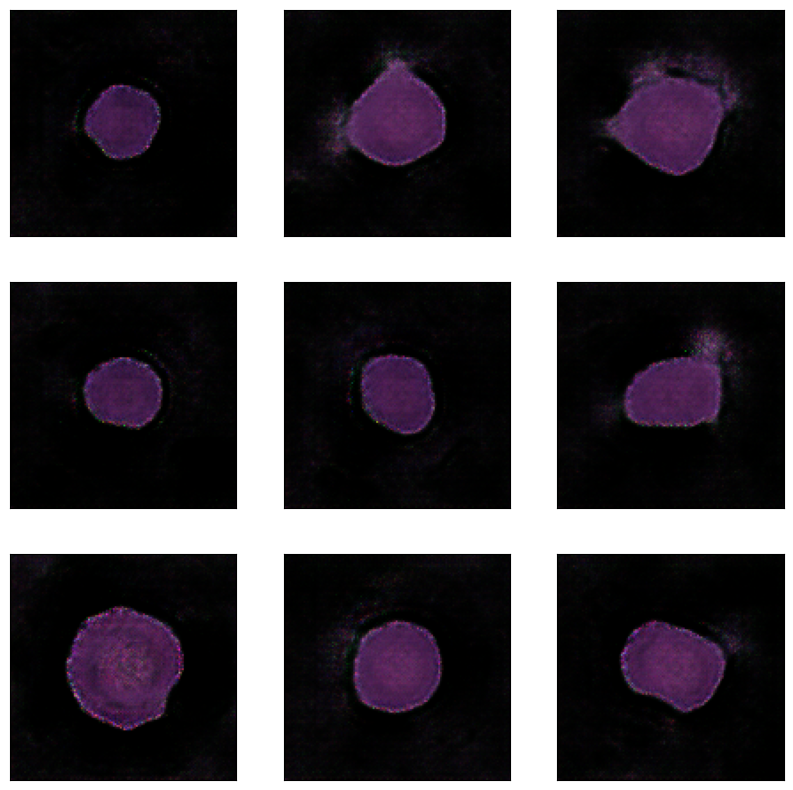

In [42]:
plot_generated_images(3)

In [ ]:
def generate_and_save_images(generator, latent_dim, num_images, save_dir):
    # Pastikan folder save_dir ada
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    
    # Loop dengan tqdm untuk progress bar
    for i in tqdm(range(1, num_images + 1), desc="Generating images"):
        # Generate 1 noise
        noise = np.random.normal(0, 1, (1, latent_dim))
        
        # Generate 1 image
        generated_image = generator(noise, training=False)
        
        # Rescale gambar dari [-1,1] ke [0,1]
        generated_image = (generated_image[0] + 1) / 2.0
        
        # Convert ke array format uint8
        img_array = np.clip(generated_image.numpy() * 255, 0, 255).astype(np.uint8)
        
        # Save sebagai BMP
        save_path = os.path.join(save_dir, f"generated_{i}.bmp")
        plt.imsave(save_path, img_array)

# Cara pakai
generate_and_save_images(generator, latent_dim, 3883, r"Your_Directory")


Generating images: 100%|██████████| 3883/3883 [10:19<00:00,  6.27it/s]
